In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')


# EDA

In [2]:
df = pd.read_csv('SpotifyFeatures.csv')

df["duration"] = df.duration_ms.apply(lambda x : x/1000)
df.drop("duration_ms", axis='columns', inplace=True)

In [3]:
df.head()

genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability   energy  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313  0.23100   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360  0.20100   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168  0.47000   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250  0.00605   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142  0.05800   

   instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0          0.000431  C#    0.0964   -14.287  Major       0.0547   86.001   
1          0.028000  D#    0.1330   -19.794  Major       0.0581  131.798   
2          0.020400   C    0.3630    -8.415  Major       0.0383   75.126   
3          0.000000   D    0.1200   -33.440  Major       0.0480   76.493   
4          0.146000   D    0.0969   -23.625  Major       0.0493  172.935   

  time_signature  valence  duration  
0            4/4   0.0886   490.867  
1            4/4   0.3690   176.797  
2            3/4   0.0696   266.184  
3            4/4   0.0380   288.573  
4            4/4   0.0382   629.760

In [4]:
print(df.shape)
df.info() 


(228159, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   energy            228159 non-null  float64
 8   instrumentalness  228159 non-null  float64
 9   key               228159 non-null  object 
 10  liveness          228159 non-null  float64
 11  loudness          228159 non-null  float64
 12  mode              228159 non-null  object 
 13  speechiness       228159 non-null  float64
 14  tempo             228159 non-null  float64
 15  time_signature    228159 non-null  object 
 16  valence



Since there are no null values, we don't have to worry about filling in missing information.

We investigate overall trends in the data to get a good idea of which variables correlate with each other as well as other associations.


In [5]:
df.describe().T

count        mean         std        min       25%  \
popularity        228159.0   44.209130   17.276599   0.000000   33.0000   
acousticness      228159.0    0.351200    0.351385   0.000001    0.0309   
danceability      228159.0    0.554198    0.183949   0.056900    0.4370   
energy            228159.0    0.580967    0.260577   0.000020    0.4050   
instrumentalness  228159.0    0.137310    0.292447   0.000000    0.0000   
liveness          228159.0    0.214638    0.196977   0.009670    0.0977   
loudness          228159.0   -9.354658    5.940994 -52.457000  -11.2870   
speechiness       228159.0    0.122442    0.186264   0.022200    0.0368   
tempo             228159.0  117.423062   30.712458  30.379000   92.7340   
valence           228159.0    0.444795    0.255397   0.000000    0.2320   
duration          228159.0  236.609231  116.678707  15.509000  186.2530   

                         50%       75%       max  
popularity         47.000000   57.0000   100.000  
acousticness        0.205000    0.6890     0.996  
danceability        0.570000    0.6900     0.987  
energy              0.618000    0.7930     0.999  
instrumentalness    0.000037    0.0234     0.999  
liveness            0.128000    0.2630     1.000  
loudness           -7.515000   -5.4150     1.585  
speechiness         0.050600    0.1090     0.967  
tempo             115.347000  138.8870   239.848  
valence             0.430000    0.6430     1.000  
duration          221.173000  264.8400  5552.917

In [6]:
artist=df.artist_name.value_counts()
artist

Giuseppe Verdi             1394
Giacomo Puccini            1137
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
                           ... 
Tennyson                      1
Vesperteen                    1
The Weeks                     1
Winona Forever                1
Pino Donaggio                 1
Name: artist_name, Length: 13318, dtype: int64

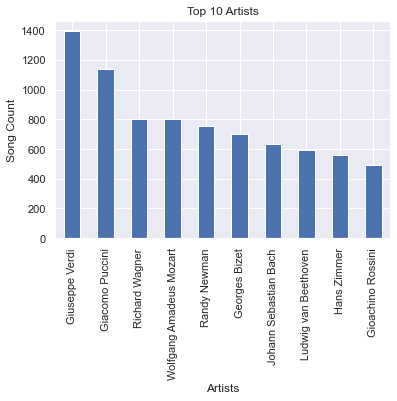

In [7]:
df['artist_name'].value_counts().head(10).plot.bar(title="Top 10 Artists")
plt.xlabel("Artists")
plt.ylabel("Song Count")

plt.show()

In [8]:
df.describe(exclude="number").T

count  unique                     top    freq
genre           228159      26                  Comedy    9681
artist_name     228159   13318          Giuseppe Verdi    1394
track_name      228159  130254                    Home     111
track_id        228159  153685  0UE0RhnRaEYsiYgXpyLoZc      10
key             228159      12                       C   26538
mode            228159       2                   Major  147123
time_signature  228159       5                     4/4  198092

Text(0.5, 1.0, 'Popularity Distribution')

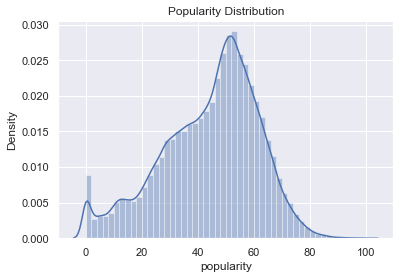

In [9]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on Key')

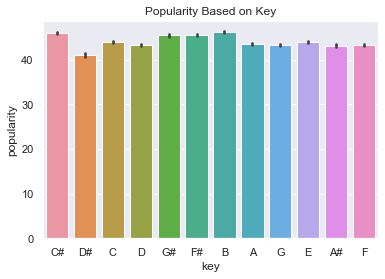

In [10]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

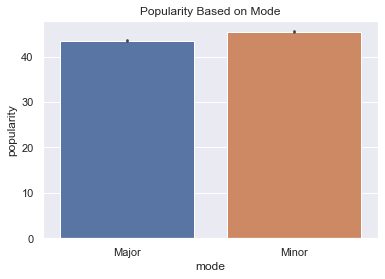

In [11]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

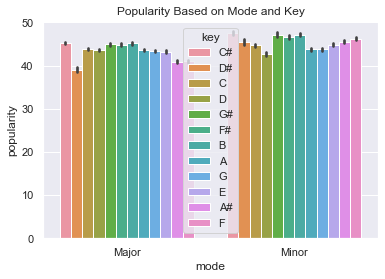

In [12]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')

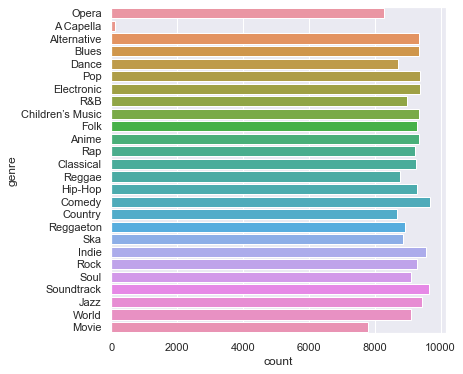

In [13]:
genre = df['genre'].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(y='genre', data=df)
plt.show()

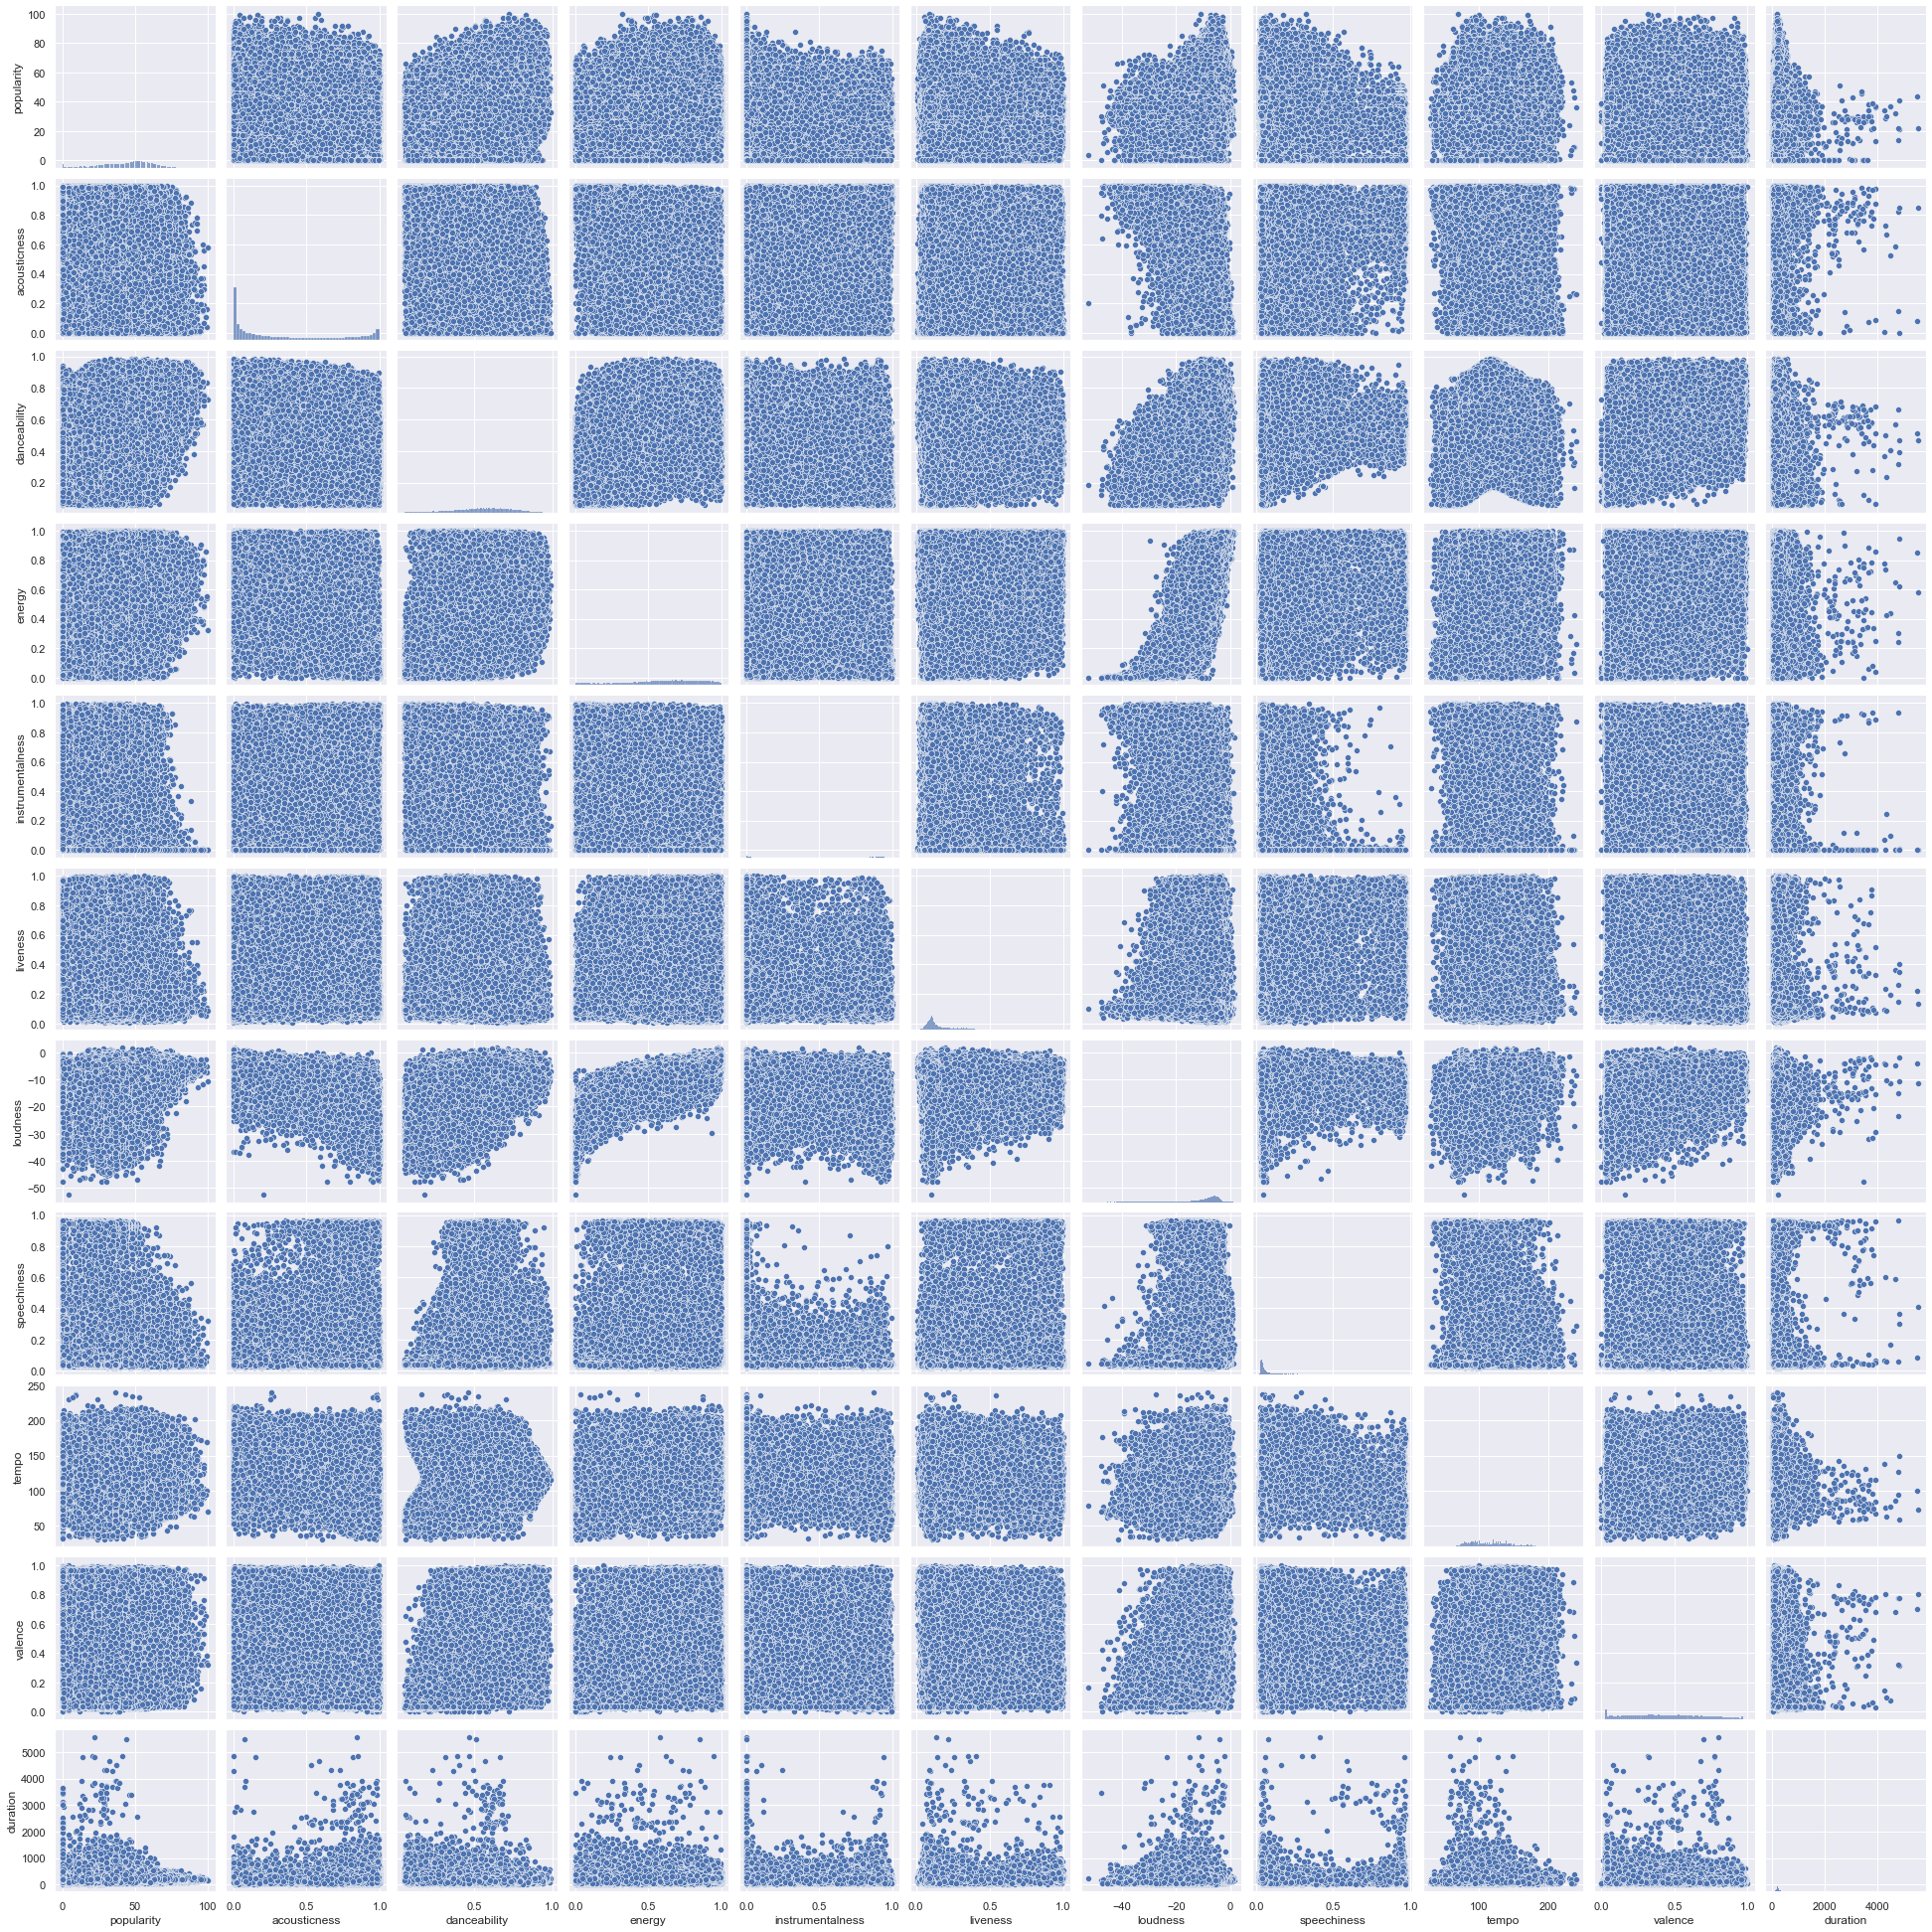

In [15]:
sns.pairplot(df)

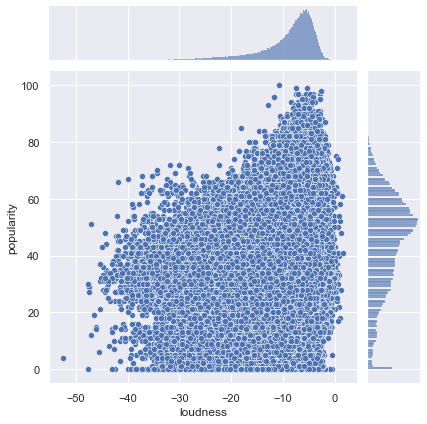

In [16]:
sns.jointplot(x = 'loudness', y = 'popularity', data = df)

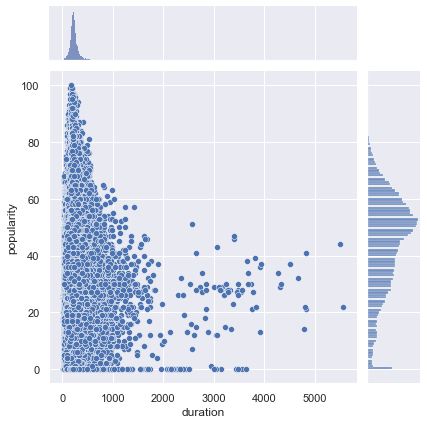

In [17]:
sns.jointplot(x = 'duration', y = 'popularity', data = df)



From this analysis, there loudness" and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity vs. songs with less than 50 popularity. We plot a summary of all relationships between the features.

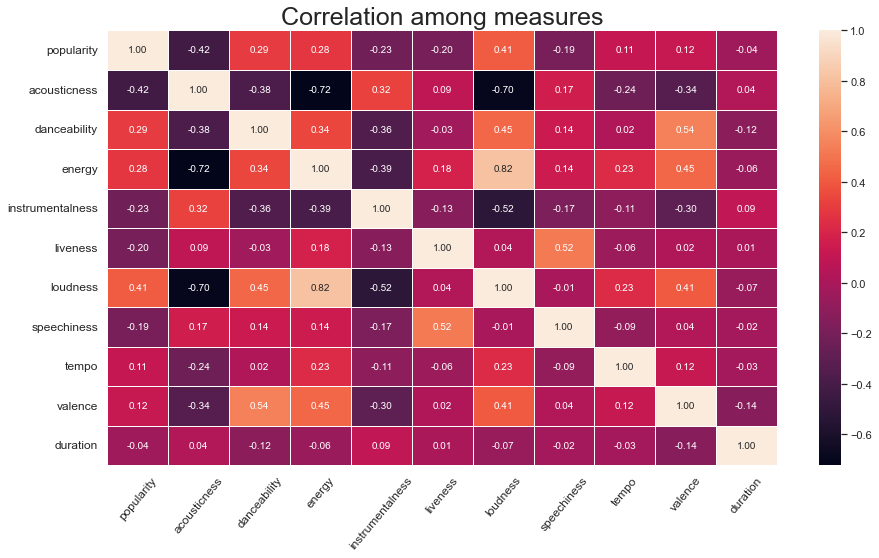

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.title('Correlation among measures', size = 25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 50)
plt.show()


- speechiness corelated to liveness
- enery corelated to loudness and opposite corelated to acousticness (sad songs aren't loud)
- danceability corelated to valence and loudness (positive songs are more danceable)



In [19]:
cv= df.dtypes=='object'
print("Categorical Variables:")
print(list(cv[df.dtypes=="object"].index))

Categorical Variables:
['genre', 'artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature']


##### (Genre , Key , Mode ,Time Signature) are Categorical Variables. They need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable or one-hot-encoded (We will see which one is best) .



There are 3 categorical variables (key, mode, and time signature) that need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0.

Key: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.


In [20]:
list_of_keys = df['key'].unique()
list_of_keys.sort()
print(list_of_keys)

for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i/10
    
df['key'] = df['key'].astype('float32')    
list_of_keys = df['key'].unique()
list_of_keys.sort()
print(list_of_keys)

['A' 'A#' 'B' 'C' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#']
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


In [21]:
list_of_time_signatures = df['time_signature'].unique()
list_of_time_signatures.sort()
print(list_of_time_signatures)
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i/10

df['time_signature'] = df['time_signature'].astype('float32')
list_of_time_signatures = df['time_signature'].unique()
list_of_time_signatures.sort()
print(list_of_time_signatures)

['0/4' '1/4' '3/4' '4/4' '5/4']
[0.  0.1 0.2 0.3 0.4]


In [22]:
list_of_genre= df['genre'].unique()
list_of_genre.sort()
print(list_of_genre)
for i in range(len(list_of_genre)):
    df.loc[df['genre'] == list_of_genre[i], 'genre'] = i/10
df['genre'] = df['genre'].astype('float32')
list_of_genre= df['genre'].unique()
list_of_genre.sort()
print(list_of_genre)

['A Capella' 'Alternative' 'Anime' 'Blues' 'Children’s Music' 'Classical'
 'Comedy' 'Country' 'Dance' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz'
 'Movie' 'Opera' 'Pop' 'R&B' 'Rap' 'Reggae' 'Reggaeton' 'Rock' 'Ska'
 'Soul' 'Soundtrack' 'World']
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5]


In [23]:
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df = df.astype({"mode": 'int64'})
CopyDF=df.copy()

In [24]:
df.sample(5)

genre     artist_name track_name                track_id  popularity  \
126146    0.6       Ron White      Intro  2WgPrnPbTU1AgQdUzdtGWx          25   
214512    2.1     Tame Impala     Gossip  79chzfFIIq7cHkqcYYORk0          58   
3476      0.8  Spandau Ballet       True  0CsM8VGDi38kusMv3pxyj1          72   
107753    1.1           Tay-K   Lemonade  26qQf1Wmyy3ZZkagqCu5kp          65   
22490     0.3         Volbeat  For Evigt  7fC2VKgYfCW68vlMhmcaAj          54   

        acousticness  danceability  energy  instrumentalness  key  liveness  \
126146      0.976000         0.618   0.326          0.000058  0.9    0.3860   
214512      0.974000         0.547   0.208          0.973000  0.2    0.1040   
3476        0.506000         0.744   0.545          0.097700  0.3    0.0649   
107753      0.104000         0.744   0.385          0.000024  0.9    0.1240   
22490       0.000309         0.506   0.893          0.000000  0.5    0.1180   

        loudness  mode  speechiness    tempo  time_signature  valence  \
126146   -14.198     1       0.7640  110.489             0.4    0.473   
214512   -17.949     0       0.0369  119.474             0.2    0.347   
3476      -9.361     1       0.0297   97.409             0.3    0.346   
107753    -8.129     0       0.6020  160.033             0.3    0.228   
22490     -3.896     1       0.0460  146.971             0.3    0.415   

        duration  
126146    60.533  
214512    55.413  
3476     328.293  
107753   132.000  
22490    283.367

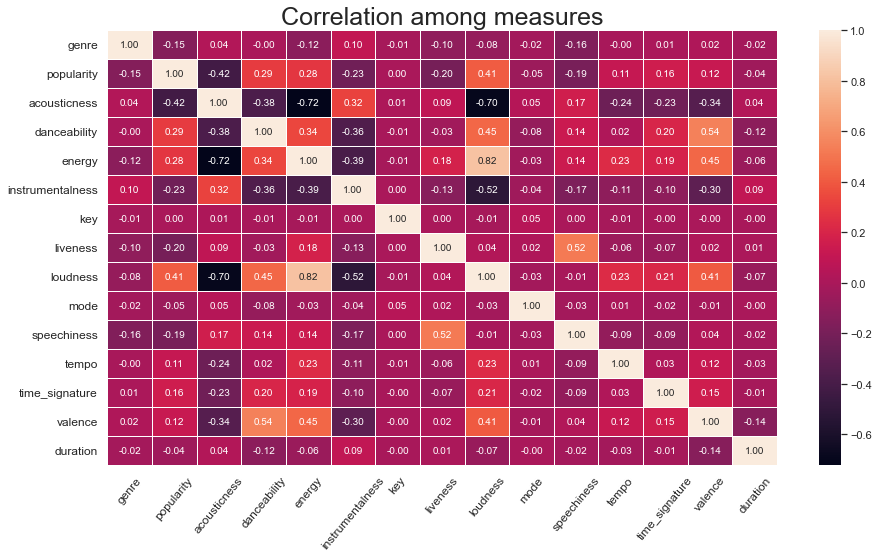

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.title('Correlation among measures', size = 25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 50)
plt.show()

Have a Good Correlation
- genre
- acousticness 
- danceability 
- energy
- instrumentalness
- liveness
- loudness
- speechiness 
- tempo 
- time_signature 
- valence

###### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
features = ["genre","acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness","speechiness", "tempo", "time_signature", "valence"]

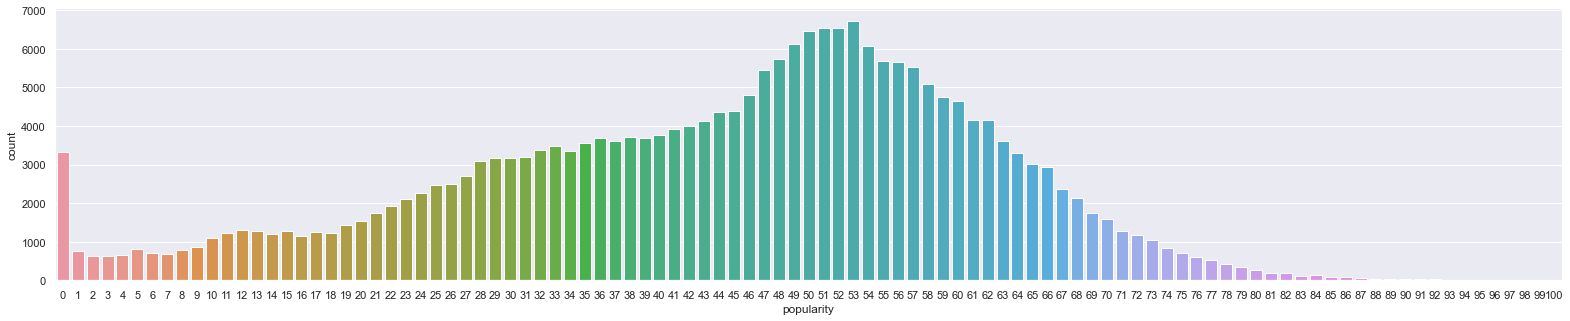

In [27]:
ax = plt.subplots(figsize=(27, 5))
ax = sns.countplot(x=df['popularity'])

In [28]:
#!pip install lightgbm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import r2_score,mean_squared_error, make_scorer, accuracy_score, roc_auc_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV



In [29]:
training = df.sample(frac = 0.8,random_state = 420)
nonseen = training.sample(frac = 0.2)
y = nonseen['popularity']
x= nonseen[features]
Y=training['popularity']
X=training[features]
X_test = df.drop(training.index)[features]
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3,random_state = 420)

In [30]:
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error, make_scorer, accuracy_score, roc_auc_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

Standardizing

In [31]:
stdandard_scale = preprocessing.StandardScaler()
df[[ 'popularity']] = stdandard_scale.fit_transform(df[['popularity']])

In [ ]:
knn=KNeighborsRegressor()
lr=LinearRegression()
dt=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbm=GradientBoostingRegressor()
svr=SVR()
#------------------------------------------------------------------------
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('RandomForestRegressor',rfr))
models.append(('GradientBoostingRegressor',gbm))
models.append(('SVR',svr))

#-------------------------------------------------------------------------
Model=[]
r2score=[]
rmse=[]
cv=[]
#-------------------------------------------------------------------------
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    
    score=r2_score(y_test,pre)
    print('R2score :',score)
    r2score.append(score*100)
    
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score :',sc)
    cv.append(sc*100)
    
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score :',rmsescore)
    rmse.append(rmsescore)
    print('\n')
# ------------------------------------------------------------------------
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

In [32]:
dfBinaryClass=CopyDF.copy()
df4Class=CopyDF.copy()
df6Class=CopyDF.copy()

In [33]:
dfBinaryClass.loc[dfBinaryClass['popularity'] < 57, 'popularity'] = 0 
dfBinaryClass.loc[dfBinaryClass['popularity'] >= 57, 'popularity'] = 1

In [34]:
df4Class.loc[(df['popularity'] >= 0) & (df4Class['popularity'] < 25), 'popularity'] = 0 
df4Class.loc[(df['popularity'] >= 25) & (df4Class['popularity'] <50), 'popularity'] = 1
df4Class.loc[(df['popularity'] >= 50) & (df4Class['popularity'] <75), 'popularity'] = 2 
df4Class.loc[(df['popularity'] >= 75) & (df4Class['popularity'] < 100), 'popularity'] = 3

In [35]:
df6Class.loc[(df6Class['popularity'] >= 0) & (df6Class['popularity'] < 20), 'popularity'] = 0 
df6Class.loc[(df6Class['popularity'] >= 20) & (df6Class['popularity'] <28 ), 'popularity'] = 1
df6Class.loc[(df6Class['popularity'] >= 28) & (df6Class['popularity'] <45), 'popularity'] = 2 
df6Class.loc[(df6Class['popularity'] >= 45) & (df6Class['popularity'] < 65), 'popularity'] = 3
df6Class.loc[(df6Class['popularity'] >= 65) & (df6Class['popularity'] < 80), 'popularity'] = 4
df6Class.loc[(df6Class['popularity'] >=80) & (df6Class['popularity'] < 100), 'popularity'] = 5

In [36]:
features = ["genre","acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness","speechiness", "tempo", "time_signature", "valence"]

In [37]:
def makeClasses(df):
    features = ["genre","acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness","speechiness", "tempo", "time_signature", "valence"]
    training = df.sample(frac = 0.8,random_state = 420)
    X = training[features]
    Y = training['popularity']
    X_test = df.drop(training.index)[features]
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2,random_state = 420)
    return x_train,x_test,y_train,y_test 

###### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
def fullModels( x_train,x_test,y_train,y_test,mode=0):
    knn = KNeighborsClassifier()     
    logr = LogisticRegression()
    rfc = RandomForestClassifier()
    dtc = DecisionTreeClassifier()
    mlp = MLPClassifier(hidden_layer_sizes=(6,5),random_state=42,learning_rate_init=0.01)
    lgbm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-8,random_state=42)
    #------------------------------------------------------------------------
    models=[]
    models.append(('KNeighbors Classifier',knn))
    models.append(('Logistic Regression',logr))
    models.append(('Decision Tree Classifier',dtc))
    models.append(('Random Forest Classifier',rfc))
    models.append(('Multi Layer Perceptron Classifier',mlp))
    models.append(('Ligth Gradient Booster Classifier',lgbm))    
    #-------------------------------------------------------------------------
    Model=[]
    accuracyL=[]
    precision=[]
    f1L=[]
    recall=[]
    aucL=[]

    for name,model in models:
        print('*****************',name,'*******************')
        Model.append(name)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)

        accuracy = accuracy_score(y_test, pred)*100
        accuracyL.append(accuracy)  
        print("Accuracy %: " ,accuracy)
       
        pre=precision_score(y_test, pred,average="weighted")*100
        precision.append(pre)
        print("Precision %: ",pre)
        
        rec=recall_score(y_test, pred,average="weighted")*100
        recall.append(rec)
        print("Recall %: ",rec)
        
        f1=f1_score(y_test, pred,average="weighted")*100
        f1L.append(f1)
        print("F1 score %: ",f1)
        print('\n')
# ------------------------------------------------------------------------
    result=pd.DataFrame({'Model':Model,'Accuracy':accuracyL,"Precision":precision,'Recall':recall,"F1 score ":f1L})
    return result


In [39]:
print("Binary Classified")
x_train,x_test,y_train,y_test = makeClasses(dfBinaryClass)
resultB = fullModels( x_train,x_test,y_train,y_test)

Binary Classified
***************** KNeighbors Classifier *******************
Accuracy %:  77.39001807921986
Precision %:  76.03715806154838
Recall %:  77.39001807921986
F1 score %:  76.48456061583508


***************** Logistic Regression *******************
Accuracy %:  75.01232674080973
Precision %:  69.35488576133902
Recall %:  75.01232674080973
F1 score %:  66.21995754034867


***************** Decision Tree Classifier *******************
Accuracy %:  82.24675395825344
Precision %:  82.4130062763095
Recall %:  82.24675395825344
F1 score %:  82.32555951786658


***************** Random Forest Classifier *******************
Accuracy %:  89.08124691831479
Precision %:  88.80542481980422
Recall %:  89.08124691831479
F1 score %:  88.72645218036236


***************** Multi Layer Perceptron Classifier *******************
Accuracy %:  77.02021585492795
Precision %:  74.41092872233386
Recall %:  77.02021585492795
F1 score %:  72.19003690831755


***************** Ligth Gradient Booster C

In [40]:
print("4 Part Classified")
x_train,x_test,y_train,y_test = makeClasses(df4Class)
result4 = fullModels( x_train,x_test,y_train,y_test)

4 Part Classified
***************** KNeighbors Classifier *******************
Accuracy %:  12.87733523256451
Precision %:  16.813537528870853
Recall %:  12.87733523256451
F1 score %:  14.257085001672026


***************** Logistic Regression *******************
Accuracy %:  3.511751492905276
Precision %:  0.4215283938274207
Recall %:  3.511751492905276
F1 score %:  0.6611175454502859


***************** Decision Tree Classifier *******************
Accuracy %:  19.43516134334082
Precision %:  19.412557950367972
Recall %:  19.43516134334082
F1 score %:  19.409275613560023


***************** Random Forest Classifier *******************


MemoryError: could not allocate 211812352 bytes

In [ ]:
print("6 Part Classified")
x_train,x_test,y_train,y_test = makeClasses(df6Class)
result6 = fullModels( x_train,x_test,y_train,y_test)

In [ ]:
print("-------------------------\nBinary Classified Result:\n-------------------------\n")
resultB


In [ ]:
print("-------------------------")
print("4 Part Classified Result:\n-------------------------\n")
result4


In [ ]:
print("-------------------------")
print("6 Part Classified Result:\n-------------------------\n")
result6


In [ ]:
import tensorflow as tf

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation="sigmoid"),
        tf.keras.layers.Dense(64, activation="sigmoid"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
training = CopyDF.sample(frac = 0.8,random_state = 420)
nonseen = training.sample(frac = 0.2)
Y=training['popularity']
X=training[features]
y = nonseen['popularity']
x= nonseen[features]

X_test = CopyDF.drop(training.index)[features]
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3,random_state = 420)

In [ ]:
model = build_model()
model.fit(x_train, y_train,epochs=130, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

In [ ]:
predictions = model.predict(x_test)
predictions[0]

In [ ]:
print("R2 score of Deep Learning Algorithm : ",r2_score(y_test,predictions))
print('Root Mean Squered ERROR of Deep Learning Algorithm :',np.sqrt(mean_squared_error(y_test,predictions)))

print("Mean Abs ERROR of Deep Learning Algorithm : ",test_mae_score)